<a href="https://colab.research.google.com/github/vanessaruama/Python---ADS/blob/main/BigData_TemaPolitica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tema escolhido: **Política**

# Dupla:

Vanessa Ruama | RA: 21022699

Renê Cardoso | RA: 21022117

In [1]:
# instalar as dependências
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-2.4.4/spark-2.4.4-bin-hadoop2.7.tgz
!tar xf spark-2.4.4-bin-hadoop2.7.tgz
!install_requires=['pyspark=={site.SPARK_VERSION}']
!pip install -q findspark

In [2]:
# configurar as variáveis de ambiente
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.4-bin-hadoop2.7"

# tornar o pyspark "importável"
import findspark
findspark.init('spark-2.4.4-bin-hadoop2.7')

In [3]:
import requests
from bs4 import BeautifulSoup as bs
texto=[]
listaSitesEDados=[]
listaSites = ["G1", "R7", "ESTADÃO", "UOL","BAND", "FOLHA", "JB", "CNNBRASIL", "BRASIL.ELPAÍS", "BBC", "ESTADO DE MINAS", "PODER360", "CARTA CAPITAL", "MAIS GOIAS", "TERRA", "JOVEMPAN", "EXAME", "INFOMONEY", "CORREIO BRASILIENSE", "VEJA"]
listaBiDimensional=[]
count = 0
sites=["https://g1.globo.com/politica/blog/valdo-cruz/post/2022/11/24/aliados-de-bolsonaro-racham-e-criticam-acao-do-pl-no-tse.ghtml","https://noticias.r7.com/brasilia/republicanos-nao-autorizou-relatorio-do-pl-que-contesta-votos-em-urnas-de-modelos-antigos-24112022","https://www.estadao.com.br/politica/lira-ganha-apoios-para-reeleicao-na-camara-ao-defender-orcamento-secreto/","https://noticias.uol.com.br/politica/ultimas-noticias/2022/11/24/pec-transicao-gleisi.htm","https://www.band.uol.com.br/noticias/republicanos-recorrerao-de-multa-de-r-22-mi-e-se-desvinculam-do-pl-sobre-urnas-16565077","https://www1.folha.uol.com.br/poder/2022/11/bolsonaro-se-reune-com-comandantes-das-forcas-armadas-apos-moraes-negar-acao-contra-urnas.shtml","https://www.jb.com.br/pais/politica/2022/11/1040835-pt-apresenta-queixa-crime-no-stf-contra-augusto-nardes-ministro-do-tcu-apos-audio-vazado.html","https://www.cnnbrasil.com.br/politica/lula-pede-para-haddad-representa-lo-em-almoco-com-banqueiros-em-sao-paulo/","https://brasil.elpais.com/brasil/2021-12-13/andre-mendonca-no-stf-vira-trunfo-de-pastores-evangelicos-mas-fieis-ignoram-batalha-politica.html","https://www.bbc.com/portuguese/brasil-63724600", "https://www.em.com.br/app/noticia/politica/2022/11/24/interna_politica,1425104/copa-ou-politica-representantes-da-esquerda-vao-usar-a-camisa-do-brasil.shtml", "https://www.poder360.com.br/congresso/jarbas-vasconcelos-tira-licenca-de-saude-do-senado-por-4-meses/?utm_source=terra_capa_noticias&utm_medium=referral", "https://www.cartacapital.com.br/politica/gleisi-atribui-atraso-na-pec-da-transicao-a-falta-de-articulacao-no-senado/?utm_source=terra_capa_noticias&utm_medium=referral", "https://www.maisgoias.com.br/trump-bannon-e-aliados-aconselharam-bolsonaro-a-contestar-eleicao-diz-jornal/?utm_source=terra_capa_noticias&utm_medium=referral", "https://www.terra.com.br/noticias/brasil/politica/apos-decisao-de-moraes-bolsonaro-se-reune-com-comandantes-das-forcas-e-ministros,899106900842a8dfbf23a4ad9b8f9a33cy8ympag.html", "https://jovempan.com.br/noticias/politica/pl-vai-recorrer-de-decisao-de-moraes-que-multou-legenda-em-r-23-milhoes.html", "https://exame.com/mundo/supremo-tribunal-do-reino-unido-rejeita-referendo-sobre-independencia-da-escocia/", "https://www.infomoney.com.br/mercados/falta-um-ministro-da-fazenda-diz-jacques-wagner-sobre-negociacao-da-pec-da-transicao/", "https://www.correiobraziliense.com.br/politica/2022/11/5054161-apos-multa-milionaria-do-tse-coligacao-de-bolsonaro-se-desfaz.html", "https://veja.abril.com.br/coluna/matheus-leitao/o-numero-1-de-lula-para-o-ministerio-da-fazenda/"] 
for s in sites:
  response = requests.get(s)
  soup = bs(response.text, 'html.parser')
  parag = soup.find_all('p')
  link=soup.find_all('a')
  for i in range(len(parag)):
    texto.append(parag[i].text.upper())
  for i in range(len(link)):
    texto.append(link[i].text.upper())

  listaBiDimensional = [listaSites[count], texto[count]]
  listaSitesEDados.append(listaBiDimensional)
  count+= 1

In [4]:
from pyspark import SparkContext

#SparkContext.stop('SparkWordCount')
sc = SparkContext(appName='SparkWordCount')
#sc = SparkContext.getOrCreate()

#input_file = sc.textFile('sample_data/data.txt')
termosExcluir=["25/11/2022","EGUNDO", "PELA","TAMBÉM"," S", "EDIÇÃO", " DOS", " ES", "PÁGINA", "TV", " O", " NO", " NA", " É", " DIA", " AS", " COMO"," R$", "POLÍTICA", "OCORRE", "VOCÊ", "1ª", "VÃª", "TERÁ", "HOJE;""POMBO?", "14PRO", " 22","VALDO","CRUZ", "POR","HÁ","ANOS"," OS"," DE"," PARA"," UM"," DOIS",".","!","-", " QUE", " DA",",","'","\\n","\n", ">"]
textoLimpo=[]

for linha in texto:
  for i in termosExcluir:
      linha=linha.replace(i," ")
  textoLimpo.append(linha)

texto=textoLimpo
input_file=sc.parallelize(texto,2)
counts = input_file.flatMap(lambda line: line.split(" ")) \
                     .map(lambda word: (word, 1)) \
                     .reduceByKey(lambda a, b: a + b)

counts.saveAsTextFile('sample_data/output07')

sc.stop()

In [5]:
file=open("sample_data/output07/part-00000")
line=file.readline()
lista=[]
while (line):
  line=line.replace("(","").replace(")","").replace("'","").strip()
  #print(line)
  termo=line.split(",")
  print(termo)
  termo[1]=int(termo[1])
  #print(termo)
  lista.append(termo)
  line=file.readline()

#print(lista)
print(lista[1][0],":",lista[1][1])
file.close()

['', ' 42887']
['ECONOMIA', ' 45']
['S', ' 288']
['ÁREAS', ' 3']
['NILSON', ' 1']
['KLAVA', ' 1']
['24/11/2022', ' 3']
['15H36', ' 1']
['NEGA', ' 4']
['PEDIDO', ' 29']
['CONTRA', ' 38']
['URNAS', ' 48']
['BOLSONARO', ' 126']
['QUASE', ' 9']
['JAIR', ' 32']
['REPUBLIC', ' 24']
['CISÃO', ' 24']
['RESULTADO', ' 23']
['ELEIÇÕES', ' 51']
['TURNO', ' 30']
['VÃO', ' 8']
['EREM', ' 3']
['MULTOU', ' 2']
['9', ' 15']
['COMPARTILHE', ' 4']
['WHATSAPPCOMPARTILHE', ' 1']
['RACHA', ' 1']
['ALIANÇA', ' 2']
['CORREU', ' 3']
['AFIRMAM', ' 7']
['TEREM', ' 2']
['RECONHECIDO', ' 3']
['ELEIÇÃO', ' 15']
['FORAM', ' 12']
['VALDEMAR', ' 18']
['AÇÃO', ' 29']
['VOTOS', ' 34']
['APRESENTADA', ' 4']
['ME', ' 29']
['ISSO', ' 31']
['MINISTRO', ' 58']
['LITIGÂNCIA', ' 3']
['TRÊS', ' 4']
['MAS', ' 47']
['PARTICIPAÇÃO', ' 6']
['PROCESSO', ' 9']
['FOMOS', ' 2']
['ER', ' 31']
['PENALIZADOS?"', ' 2']
['STIONOU', ' 2']
['CLÁUDIO', ' 2']
['CAJADO', ' 3']
['BA', ' 3']
['NESTA', ' 16']
['QUINTA', ' 8']
['FEIRA', ' 24']
['ADO

1-Tabela com os 10 termos com mais ocorrências

In [6]:
import pandas as pd

lista_palavras = []
lista_quantidade = []

for item in lista:
  palavra = item[0].replace("Ã§Ã£", "ÇÃ").replace("Ã§", "Ç").replace("Ã£", "Ã").replace("Ã³", "Ó").replace("Ã¡", "Á")

  if len(palavra) > 3:
    lista_palavras.append(palavra)
    lista_quantidade.append(item[1])

df_palavras=pd.Series(lista_palavras)
df_quantidade=pd.Series(lista_quantidade)

df_politica=pd.DataFrame({'Palavras':df_palavras, 'Quantidade': df_quantidade})
df_politica = df_politica.sort_values(by=['Quantidade'], ascending= False).head(11)
df_politica= df_politica[1:]
df_politica

,Palavras,Quantidade
154,LULA,117
147,BRASIL,100
153,GOVERNO,71
35,MINISTRO,58
215,JORNAL,57
105,MUNDO,53
16,ELEIÇÕES,51
9,URNAS,48
0,ECONOMIA,45
8,CONTRA,38


2-Gráfico de Pizza com os 10 termos mais encontrados nos sites

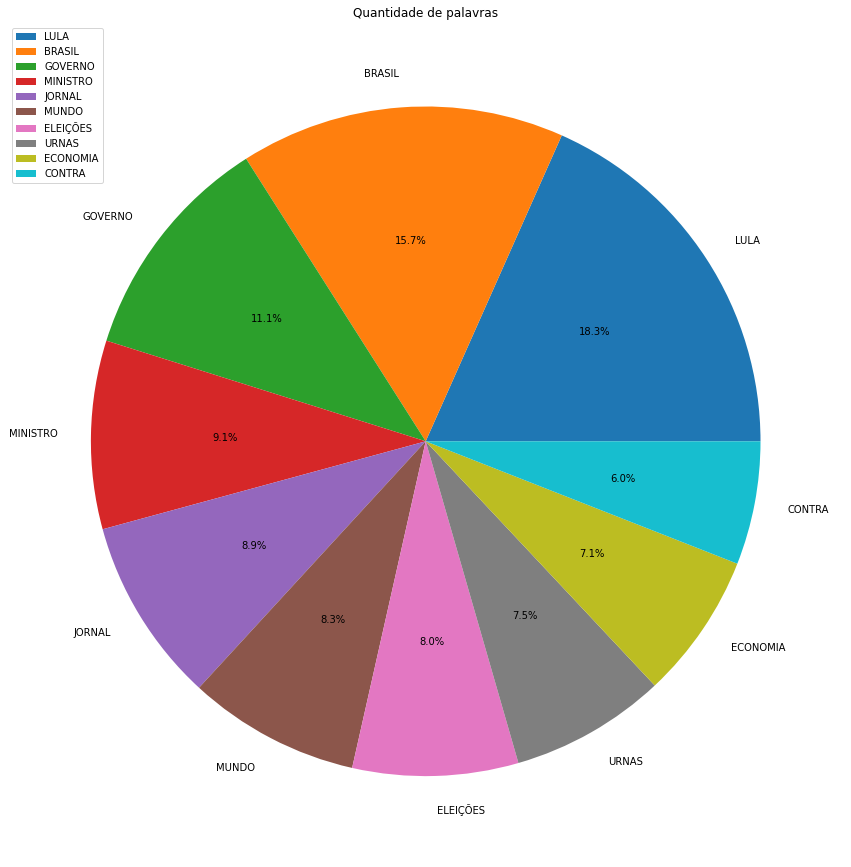

In [7]:
import matplotlib.pyplot as plt

graf_palavras = df_politica.Palavras
graf_quantidade = df_politica.Quantidade

fig, leg=plt.subplots()
plt.pie(graf_quantidade, labels=graf_palavras, autopct="%1.1f%%")
leg.legend(graf_palavras, loc="upper left")
plt.title("Quantidade de palavras")
fig.set_size_inches(15, 20)
plt.show()

3-Gráfico de Barra indicando Site e Qtde de Vezes que os 10 termos mais ranqueados aparece

In [8]:
import requests
from bs4 import BeautifulSoup as bs
texto=[]
listaSitesEDados=[]
listaSites = ["G1", "R7", "ESTADÃO", "UOL","BAND", "FOLHA", "JB", "CNNBRASIL", "BRASIL.ELPAÍS", "BBC", "ESTADO DE MINAS", "PODER360", "CARTA CAPITAL", "MAIS GOIAS", "TERRA", "JOVEMPAN", "EXAME", "INFOMONEY", "CORREIO BRASILIENSE", "VEJA"]
listaBiDimensional=[]
count = 0
sites=["https://g1.globo.com/politica/blog/valdo-cruz/post/2022/11/24/aliados-de-bolsonaro-racham-e-criticam-acao-do-pl-no-tse.ghtml","https://noticias.r7.com/brasilia/republicanos-nao-autorizou-relatorio-do-pl-que-contesta-votos-em-urnas-de-modelos-antigos-24112022","https://www.estadao.com.br/politica/lira-ganha-apoios-para-reeleicao-na-camara-ao-defender-orcamento-secreto/","https://noticias.uol.com.br/politica/ultimas-noticias/2022/11/24/pec-transicao-gleisi.htm","https://www.band.uol.com.br/noticias/republicanos-recorrerao-de-multa-de-r-22-mi-e-se-desvinculam-do-pl-sobre-urnas-16565077","https://www1.folha.uol.com.br/poder/2022/11/bolsonaro-se-reune-com-comandantes-das-forcas-armadas-apos-moraes-negar-acao-contra-urnas.shtml","https://www.jb.com.br/pais/politica/2022/11/1040835-pt-apresenta-queixa-crime-no-stf-contra-augusto-nardes-ministro-do-tcu-apos-audio-vazado.html","https://www.cnnbrasil.com.br/politica/lula-pede-para-haddad-representa-lo-em-almoco-com-banqueiros-em-sao-paulo/","https://brasil.elpais.com/brasil/2021-12-13/andre-mendonca-no-stf-vira-trunfo-de-pastores-evangelicos-mas-fieis-ignoram-batalha-politica.html","https://www.bbc.com/portuguese/brasil-63724600", "https://www.em.com.br/app/noticia/politica/2022/11/24/interna_politica,1425104/copa-ou-politica-representantes-da-esquerda-vao-usar-a-camisa-do-brasil.shtml", "https://www.poder360.com.br/congresso/jarbas-vasconcelos-tira-licenca-de-saude-do-senado-por-4-meses/?utm_source=terra_capa_noticias&utm_medium=referral", "https://www.cartacapital.com.br/politica/gleisi-atribui-atraso-na-pec-da-transicao-a-falta-de-articulacao-no-senado/?utm_source=terra_capa_noticias&utm_medium=referral", "https://www.maisgoias.com.br/trump-bannon-e-aliados-aconselharam-bolsonaro-a-contestar-eleicao-diz-jornal/?utm_source=terra_capa_noticias&utm_medium=referral", "https://www.terra.com.br/noticias/brasil/politica/apos-decisao-de-moraes-bolsonaro-se-reune-com-comandantes-das-forcas-e-ministros,899106900842a8dfbf23a4ad9b8f9a33cy8ympag.html", "https://jovempan.com.br/noticias/politica/pl-vai-recorrer-de-decisao-de-moraes-que-multou-legenda-em-r-23-milhoes.html", "https://exame.com/mundo/supremo-tribunal-do-reino-unido-rejeita-referendo-sobre-independencia-da-escocia/", "https://www.infomoney.com.br/mercados/falta-um-ministro-da-fazenda-diz-jacques-wagner-sobre-negociacao-da-pec-da-transicao/", "https://www.correiobraziliense.com.br/politica/2022/11/5054161-apos-multa-milionaria-do-tse-coligacao-de-bolsonaro-se-desfaz.html", "https://veja.abril.com.br/coluna/matheus-leitao/o-numero-1-de-lula-para-o-ministerio-da-fazenda/"] 
for s in sites:
  response = requests.get(s)
  soup = bs(response.text, 'html.parser')
  parag = soup.find_all('p')
  link=soup.find_all('a')
  for i in range(len(parag)):
    texto.append(parag[i].text.upper())
  for i in range(len(link)):
    texto.append(link[i].text.upper())


  listaBiDimensional = [listaSites[count], texto]
  listaSitesEDados.append(listaBiDimensional)
  texto=[]
  count+= 1

print(listaSitesEDados[2][1])

['ESTADÃO', 'POLÍTICA', 'MINHA CONTA', 'TRÂNSITO', 'TEMPO', 'HORÓSCOPO', 'QUADRINHOS', 'LOTERIAS', 'APLICATIVOS', 'ASSINE', 'MINHA CONTA', 'TRÂNSITO', 'TEMPO', 'HORÓSCOPO', 'QUADRINHOS', 'LOTERIAS', 'APLICATIVOS', 'ASSINE', 'OPINIÃO', 'POLÍTICA', 'ECONOMIA & NEGÓCIOS ', 'BRASIL', 'INTERNACIONAL', 'ESPORTES', 'CULTURA', 'ÚLTIMAS', 'ACERVO', 'PME', 'JORNAL DO CARRO', 'PALADAR', 'LINK', 'E+', 'VIAGEM', 'CLASSIFICADOS', 'RADIO ELDORADO', 'ALIÁS', 'EDUCAÇÃO', 'CIÊNCIA', 'SUSTENTABILIDADE', 'SAÚDE', 'SÃO PAULO', 'TUDO SOBRE', 'AO VIVO', 'BLOGS', 'COLUNAS', 'TV ESTADÃO', 'APLICATIVOS', 'INFOGRÁFICOS', 'FOTOS', 'VOCÊ NO ESTADÃO', 'ESTADÃO DADOS', 'HORÓSCOPO', 'LOTERIAS', 'TEMPO', 'TRÂNSITO', 'NEWSLETTER', 'QUADRINHOS', 'SUDOKU', 'CRUZADAS', 'MOVING', 'ESTRADÃO', 'BROADCAST POLÍTICO', 'ESTADÃO BLUE STUDIO', 'PUBLICIDADE', 'PUBLICIDADE', 'BRASÍLIA – COM PODER SOBRE O DESTINO DO ORÇAMENTO SECRETO, O PRESIDENTE DA CÂMARA, ARTHUR LIRA (PP-AL), É HOJE FAVORITO À REELEIÇÃO, A PARTIR DE FEVEREIRO DE 2

In [9]:
from pyspark import SparkContext

def gerarArquivo(texto, nome):
  #SparkContext.stop('SparkWordCount')
  sc = SparkContext.getOrCreate()

  #input_file = sc.textFile('sample_data/data.txt')
  termosExcluir=["25/11/2022","EGUNDO", "PELA","TAMBÉM"," S", "EDIÇÃO", " DOS", " ES", "PÁGINA", "TV", " O", " NO", " NA", " É", " DIA", " AS", " COMO"," R$", "POLÍTICA", "OCORRE", "VOCÊ", "1ª", "VÃª", "TERÁ", "HOJE;""POMBO?", "14PRO", " 22","VALDO","CRUZ", "POR","HÁ","ANOS"," OS"," DE"," PARA"," UM"," DOIS",".","!","-", " QUE", " DA",",","'","\\n","\n", ">"]
  textoLimpo=[]
  print(texto)
  for linha in texto:
    for i in termosExcluir:
        linha=linha.replace(i," ")
    textoLimpo.append(linha)

  texto=textoLimpo
  print(texto)
  input_file=sc.parallelize(texto,2)
  counts = input_file.flatMap(lambda line: line.split(" ")) \
                      .map(lambda word: (word, 1)) \
                      .reduceByKey(lambda a, b: a + b)

  counts.saveAsTextFile('sample_data/output_file' + nome)

  sc.stop()

In [10]:
for i in range(20):
  gerarArquivo(listaSitesEDados[i][1], str(i))

['FIQUE POR DENTRO', ' POR VALDO CRUZ ', ' COMENTARISTA DE POLÍTICA E ECONOMIA DA GLOBONEWS. COBRE OS BASTIDORES DAS DUAS ÁREAS HÁ 30 ANOS', ' VALDO CRUZ E NILSON KLAVA — GLOBONEWS, EM BRASÍLIA ', '  24/11/2022 15H36    ATUALIZADO  24/11/2022    ', ' MORAES NEGA PEDIDO DO PL CONTRA URNAS E MULTA COLIGAÇÃO DE BOLSONARO EM QUASE R$ 23 MI ', ' PARTIDOS DA COLIGAÇÃO DO PRESIDENTE JAIR BOLSONARO, PP E REPUBLICANOS NÃO CONCORDAM COM A DECISÃO DO PL DE ENTRAR NO TSE CONTRA O RESULTADO DAS ELEIÇÕES NO SEGUNDO TURNO. AS SIGLAS VÃO PEDIR AO TRIBUNAL PARA SEREM EXCLUÍDAS DA DECISÃO QUE MULTOU A COLIGAÇÃO EM R$ 22,9 MILHÕES. ', 'COMPARTILHE NO WHATSAPPCOMPARTILHE NO TELEGRAM', ' O RACHA NA ALIANÇA DE PARTIDOS OCORREU PORQUE PP E REPUBLICANOS AFIRMAM TEREM RECONHECIDO O RESULTADO DA ELEIÇÃO PRESIDENCIAL – E DIZEM QUE NÃO FORAM AVISADOS PELO PRESIDENTE DO PL, VALDEMAR COSTA NETO, DA AÇÃO QUE CONTESTARIA OS VOTOS NA JUSTIÇA ELEITORAL. ', ' A AÇÃO FOI APRESENTADA EM NOME DA COLIGAÇÃO E, POR ISSO, A DE

In [11]:
def repeticaoDePalavras(nome):
  file=open("sample_data/output_file" + nome + "/part-00000")
  line=file.readline()
  lista=[]
  while (line):
    line=line.replace("(","").replace(")","").replace("'","").strip()
    #print(line)
    termo=line.split(",")
    print(termo)
    termo[1]=int(termo[1])
    #print(termo)
    lista.append(termo)
    line=file.readline()

  file.close()
  return lista

In [12]:
import pandas as pd

lista_termos = []
listaPorSite = []

for i in range(20):
  lista = repeticaoDePalavras(str(i))
  for item in lista:
    palavra = item[0].replace("Ã§Ã£", "ÇÃ").replace("Ã§", "Ç").replace("Ã£", "Ã").replace("Ã³", "Ó").replace("Ã¡", "Á")
    for top in df_politica.Palavras:
      if palavra == top:
        lista_termos.append([palavra, item[1]])

  listaPorSite.append(lista_termos)
  lista_termos = []


A saída de streaming foi truncada nas últimas 5000 linhas.
['GLOBO', ' 26']
['RURAL', ' 26']
['CIÊNCIA', ' 2']
['VIVA', ' 1']
['CARNAVAL', ' 7']
['RIO', ' 19']
['PERNAMBUCO', ' 4']
['GERAIS', ' 8']
['BITCOIN', ' 1']
['DÓLAR', ' 1']
['EDUCAÇÃO', ' 6']
['OPEN', ' 1']
['BANKING', ' 1']
['G1', ' 9']
['GUIA', ' 3']
['CARREIRAS', ' 1']
['TESTE', ' 1']
['VOCACIONAL', ' 1']
['EMPREENDEDORISMO\\u200b', ' 2']
['PEQUENAS', ' 3']
['EMPRESAS', ' 4']
['MENOS', ' 1']
['FEST', ' 1']
['COMPRAS', ' 1']
['LOTERIAS', ' 2']
['AMBIENTE', ' 2']
['TUREZA', ' 1']
['MONITOR', ' 1']
['VIOLÊNCIA', ' 1']
['GUERRA', ' 1']
['UCRÂNIA', ' 1']
['OLHA', ' 1']
['REFORMA', ' 1']
['ARTE', ' 2']
['GAMES', ' 1']
['MÚSICA', ' 1']
['RIES', ' 3']
['ROCK', ' 1']
['SAÚDE', ' 2']
['TAR', ' 2']
['TECNOLOGIA', ' 1']
['TRABALHO', ' 2']
['EMPREGO', ' 1']
['DESCUBRA', ' 1']
['APURAÇÃO', ' 1']
['NÚMEROS', ' 1']
['PESQUISAS', ' 1']
['ELEITORAIS', ' 1']
['COLHO?', ' 1']
['POLÍTICOS', ' 1']
['CENTRO', ' 4']
['OESTE', ' 6']
['DISTRITO', ' 2

In [13]:
listaPorSite[9]

[['BRASIL', 11],
 ['URNAS', 15],
 ['ELEIÇÕES', 12],
 ['LULA', 5],
 ['CONTRA', 2],
 ['ECONOMIA', 2],
 ['MUNDO', 1]]

In [14]:
lista_top10 = []
for palavra in df_politica.Palavras:
  lista_top10.append(palavra)

print(lista_top10)

['LULA', 'BRASIL', 'GOVERNO', 'MINISTRO', 'JORNAL', 'MUNDO', 'ELEIÇÕES', 'URNAS', 'ECONOMIA', 'CONTRA']


In [15]:
def somarQtd(lista):
  soma = 0
  for i in range(len(lista)):
    soma += lista[i][1]

  return soma

In [16]:
import matplotlib.pyplot as plt

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

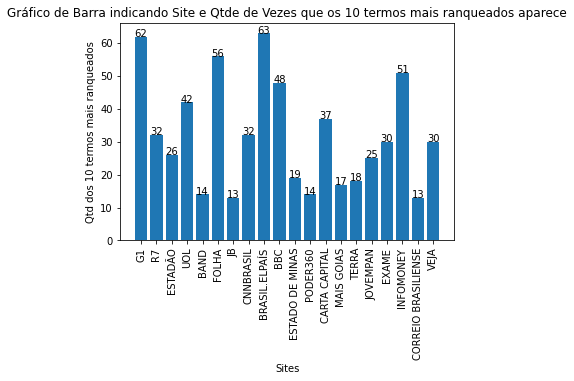

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from textwrap import wrap

dados = pd.Series([somarQtd(listaPorSite[0]), somarQtd(listaPorSite[1]), somarQtd(listaPorSite[2]), somarQtd(listaPorSite[3]),somarQtd(listaPorSite[4]),somarQtd(listaPorSite[5]),somarQtd(listaPorSite[6]),somarQtd(listaPorSite[7]),somarQtd(listaPorSite[8]),somarQtd(listaPorSite[9]),somarQtd(listaPorSite[10]),somarQtd(listaPorSite[11]),somarQtd(listaPorSite[12]),somarQtd(listaPorSite[13]),somarQtd(listaPorSite[14]),somarQtd(listaPorSite[15]),somarQtd(listaPorSite[16]),somarQtd(listaPorSite[17]),somarQtd(listaPorSite[18]),somarQtd(listaPorSite[19])], index=listaSites)
plt.bar(dados.index, dados.values)
addlabels(dados.index, dados.values)
plt.title("Gráfico de Barra indicando Site e Qtde de Vezes que os 10 termos mais ranqueados aparece")
plt.ylabel("Qtd dos 10 termos mais ranqueados")
plt.xlabel("Sites")
plt.xticks(range(len(dados.index)), dados.index, rotation=90)   
plt.show()

# **GRÁFICO EXTRA** | Gráfico empilhado

In [18]:
G1 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,]
R7 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,]
ESTADAO = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,]
UOL = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,]
BAND = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,]
FOLHA = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,]
JB = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,]
CNNBRASIL = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,]
BRASILELPAIS  = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,]
BBC  = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,]
ESTADODEMINAS  = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,]
PODER360  = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,]
CARTACAPITAL  = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,]
MAISGOIAS  = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,]
TERRA  = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,]
JOVEMPAN  = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,]
EXAME  = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,]
INFOMONEY  = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,]
CORREIOBRASILIENSE  = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,]
VEJA  = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,]


count = 0

for item in listaPorSite:
  for i in range(len(item)):
    if item[i][0] == lista_top10[0]:
      if count == 0:
        G1[0] = item[i][1]
      elif count == 1:
        R7[0] = item[i][1]
      elif count == 2:
        ESTADAO[0] = item[i][1]
      elif count == 3:
        UOL[0] = item[i][1]
      elif count == 4:
        BAND[0] = item[i][1]
      elif count == 5:
        FOLHA[0] = item[i][1]
      elif count == 6:
        JB[0] = item[i][1]
      elif count == 7:
        CNNBRASIL[0] = item[i][1]
      elif count == 8:
        BRASILELPAIS[0]  = item[i][1]
      elif count == 9:
        BBC[0]  = item[i][1]
      elif count == 10:
        ESTADODEMINAS[0]  = item[i][1]
      elif count == 11:
        PODER360[0]  = item[i][1]
      elif count == 12:
        CARTACAPITAL[0]  = item[i][1]
      elif count == 13:
        MAISGOIAS[0] = item[i][1]
      elif count == 14:
        TERRA[0]  = item[i][1]
      elif count == 15:
        JOVEMPAN[0] = item[i][1]
      elif count == 16:
        EXAME[0]  = item[i][1]
      elif count == 17:
        INFOMONEY[0] = item[i][1]
      elif count == 18:
        CORREIOBRASILIENSE[0] = item[i][1]
      elif count == 19:
        VEJA[0] = item[i][1]

    elif item[i][0] == lista_top10[1]:
      if count == 0:
        G1[1] = item[i][1]
      elif count == 1:
        R7[1] = item[i][1]
      elif count == 2:
        ESTADAO[1] = item[i][1]
      elif count == 3:
        UOL[1] = item[i][1]
      elif count == 4:
        BAND[1] = item[i][1]
      elif count == 5:
        FOLHA[1] = item[i][1]
      elif count == 6:
        JB[1] = item[i][1]
      elif count == 7:
        CNNBRASIL[1] = item[i][1]
      elif count == 8:
        BRASILELPAIS[1]  = item[i][1]
      elif count == 9:
        BBC[1]  = item[i][1]
      elif count == 10:
        ESTADODEMINAS[1]  = item[i][1]
      elif count == 11:
        PODER360[1]  = item[i][1]
      elif count == 12:
        CARTACAPITAL[1]  = item[i][1]
      elif count == 13:
        MAISGOIAS[1]  = item[i][1]
      elif count == 14:
        TERRA[1]  = item[i][1]
      elif count == 15:
        JOVEMPAN[1] = item[i][1]
      elif count == 16:
        EXAME[1]  = item[i][1]
      elif count == 17:
        INFOMONEY[1] = item[i][1]
      elif count == 18:
        CORREIOBRASILIENSE[1] = item[i][1]
      elif count == 19:
        VEJA[1] = item[i][1]
    elif item[i][0] == lista_top10[2]:
      if count == 0:
        G1[2] = item[i][1]
      elif count == 1:
        R7[2] = item[i][1]
      elif count == 2:
        ESTADAO[2] = item[i][1]
      elif count == 3:
        UOL[2] = item[i][1]
      elif count == 4:
        BAND[2] = item[i][1]
      elif count == 5:
        FOLHA[2] = item[i][1]
      elif count == 6:
        JB[2] = item[i][1]
      elif count == 7:
        CNNBRASIL[2] = item[i][1]
      elif count == 8:
        BRASILELPAIS[2]  = item[i][1]
      elif count == 9:
        BBC[2]  = item[i][1]
      elif count == 10:
        ESTADODEMINAS[2]  = item[i][1]
      elif count == 11:
        PODER360[2]  = item[i][1]
      elif count == 12:
        CARTACAPITAL[2]  = item[i][1]
      elif count == 13:
        MAISGOIAS[2]  = item[i][1]
      elif count == 14:
        TERRA[2]  = item[i][1]
      elif count == 15:
        JOVEMPAN[2] = item[i][1]
      elif count == 16:
        EXAME[2]  = item[i][1]
      elif count == 17:
        INFOMONEY[2] = item[i][1]
      elif count == 18:
        CORREIOBRASILIENSE[2] = item[i][1]
      elif count == 19:
        VEJA[2] = item[i][1]
    elif item[i][0] == lista_top10[3]:
      if count == 0:
        G1[3] = item[i][1]
      elif count == 1:
        R7[3] = item[i][1]
      elif count == 2:
        ESTADAO[3] = item[i][1]
      elif count == 3:
        UOL[3] = item[i][1]
      elif count == 4:
        BAND[3] = item[i][1]
      elif count == 5:
        FOLHA[3] = item[i][1]
      elif count == 6:
        JB[3] = item[i][1]
      elif count == 7:
        CNNBRASIL[3] = item[i][1]
      elif count == 8:
        BRASILELPAIS[3]  = item[i][1]
      elif count == 9:
        BBC[3]  = item[i][1]
      elif count == 10:
        ESTADODEMINAS[3]  = item[i][1]
      elif count == 11:
        PODER360[3]  = item[i][1]
      elif count == 12:
        CARTACAPITAL[3]  = item[i][1]
      elif count == 13:
        MAISGOIAS[3]  = item[i][1]
      elif count == 14:
        TERRA[3]  = item[i][1]
      elif count == 15:
        JOVEMPAN[3] = item[i][1]
      elif count == 16:
        EXAME[3]  = item[i][1]
      elif count == 17:
        INFOMONEY[3] = item[i][1]
      elif count == 18:
        CORREIOBRASILIENSE[3] = item[i][1]
      elif count == 19:
        VEJA[3] = item[i][1]
    elif item[i][0] == lista_top10[4]:
      if count == 0:
        G1[4] = item[i][1]
      elif count == 1:
        R7[4] = item[i][1]
      elif count == 2:
        ESTADAO[4] = item[i][1]
      elif count == 3:
        UOL[4] = item[i][1]
      elif count == 4:
        BAND[4] = item[i][1]
      elif count == 5:
        FOLHA[4] = item[i][1]
      elif count == 6:
        JB[4] = item[i][1]
      elif count == 7:
        CNNBRASIL[4] = item[i][1]
      elif count == 8:
        BRASILELPAIS[4]  = item[i][1]
      elif count == 9:
        BBC[4]  = item[i][1]
      elif count == 10:
        ESTADODEMINAS[4]  = item[i][1]
      elif count == 11:
        PODER360[4]  = item[i][1]
      elif count == 12:
        CARTACAPITAL[4]  = item[i][1]
      elif count == 13:
        MAISGOIAS[4]  = item[i][1]
      elif count == 14:
        TERRA[4]  = item[i][1]
      elif count == 15:
        JOVEMPAN[4] = item[i][1]
      elif count == 16:
        EXAME[4]  = item[i][1]
      elif count == 17:
        INFOMONEY[4] = item[i][1]
      elif count == 18:
        CORREIOBRASILIENSE[4] = item[i][1]
      elif count == 19:
        VEJA[4] = item[i][1]
    elif item[i][0] == lista_top10[5]:
      if count == 0:
        G1[5] = item[i][1]
      elif count == 1:
        R7[5] = item[i][1]
      elif count == 2:
        ESTADAO[5] = item[i][1]
      elif count == 3:
        UOL[5] = item[i][1]
      elif count == 5:
        BAND[5] = item[i][1]
      elif count == 5:
        FOLHA[5] = item[i][1]
      elif count == 6:
        JB[5] = item[i][1]
      elif count == 7:
        CNNBRASIL[5] = item[i][1]
      elif count == 8:
        BRASILELPAIS[5]  = item[i][1]
      elif count == 9:
        BBC[5]  = item[i][1]
      elif count == 10:
        ESTADODEMINAS[5]  = item[i][1]
      elif count == 11:
        PODER360[5]  = item[i][1]
      elif count == 12:
        CARTACAPITAL[5]  = item[i][1]
      elif count == 13:
        MAISGOIAS[5]  = item[i][1]
      elif count == 15:
        TERRA[5]  = item[i][1]
      elif count == 15:
        JOVEMPAN[5] = item[i][1]
      elif count == 16:
        EXAME[5]  = item[i][1]
      elif count == 17:
        INFOMONEY[5] = item[i][1]
      elif count == 18:
        CORREIOBRASILIENSE[5] = item[i][1]
      elif count == 19:
        VEJA[5] = item[i][1]
    elif item[i][0] == lista_top10[6]:
      if count == 0:
        G1[6] = item[i][1]
      elif count == 1:
        R7[6] = item[i][1]
      elif count == 2:
        ESTADAO[6] = item[i][1]
      elif count == 3:
        UOL[6] = item[i][1]
      elif count == 6:
        BAND[6] = item[i][1]
      elif count == 6:
        FOLHA[6] = item[i][1]
      elif count == 6:
        JB[6] = item[i][1]
      elif count == 7:
        CNNBRASIL[6] = item[i][1]
      elif count == 8:
        BRASILELPAIS[6]  = item[i][1]
      elif count == 9:
        BBC[6]  = item[i][1]
      elif count == 10:
        ESTADODEMINAS[6]  = item[i][1]
      elif count == 11:
        PODER360[6]  = item[i][1]
      elif count == 12:
        CARTACAPITAL[6]  = item[i][1]
      elif count == 13:
        MAISGOIAS[6]  = item[i][1]
      elif count == 14:
        TERRA[6]  = item[i][1]
      elif count == 15:
        JOVEMPAN[6] = item[i][1]
      elif count == 16:
        EXAME[6]  = item[i][1]
      elif count == 17:
        INFOMONEY[6] = item[i][1]
      elif count == 18:
        CORREIOBRASILIENSE[6] = item[i][1]
      elif count == 19:
        VEJA[6] = item[i][1]
    elif item[i][0] == lista_top10[7]:
      if count == 0:
        G1[7] = item[i][1]
      elif count == 1:
        R7[7] = item[i][1]
      elif count == 2:
        ESTADAO[7] = item[i][1]
      elif count == 3:
        UOL[7] = item[i][1]
      elif count == 4:
        BAND[7] = item[i][1]
      elif count == 5:
        FOLHA[7] = item[i][1]
      elif count == 6:
        JB[7] = item[i][1]
      elif count == 7:
        CNNBRASIL[7] = item[i][1]
      elif count == 8:
        BRASILELPAIS[7]  = item[i][1]
      elif count == 9:
        BBC[7]  = item[i][1]
      elif count == 10:
        ESTADODEMINAS[7]  = item[i][1]
      elif count == 11:
        PODER360[7]  = item[i][1]
      elif count == 12:
        CARTACAPITAL[7]  = item[i][1]
      elif count == 13:
        MAISGOIAS[7]  = item[i][1]
      elif count == 14:
        TERRA[7]  = item[i][1]
      elif count == 15:
        JOVEMPAN[7] = item[i][1]
      elif count == 16:
        EXAME[7]  = item[i][1]
      elif count == 17:
        INFOMONEY[7] = item[i][1]
      elif count == 18:
        CORREIOBRASILIENSE[7] = item[i][1]
      elif count == 19:
        VEJA[7] = item[i][1]
    elif item[i][0] == lista_top10[8]:
      if count == 0:
        G1[8] = item[i][1]
      elif count == 1:
        R7[8] = item[i][1]
      elif count == 2:
        ESTADAO[8] = item[i][1]
      elif count == 3:
        UOL[8] = item[i][1]
      elif count == 4:
        BAND[8] = item[i][1]
      elif count == 5:
        FOLHA[8] = item[i][1]
      elif count == 6:
        JB[8] = item[i][1]
      elif count == 7:
        CNNBRASIL[8] = item[i][1]
      elif count == 8:
        BRASILELPAIS[8]  = item[i][1]
      elif count == 9:
        BBC[8]  = item[i][1]
      elif count == 10:
        ESTADODEMINAS[8]  = item[i][1]
      elif count == 11:
        PODER360[8]  = item[i][1]
      elif count == 12:
        CARTACAPITAL[8]  = item[i][1]
      elif count == 13:
        MAISGOIAS[8]  = item[i][1]
      elif count == 14:
        TERRA[8]  = item[i][1]
      elif count == 15:
        JOVEMPAN[8] = item[i][1]
      elif count == 16:
        EXAME[8]  = item[i][1]
      elif count == 17:
        INFOMONEY[8] = item[i][1]
      elif count == 18:
        CORREIOBRASILIENSE[8] = item[i][1]
      elif count == 19:
        VEJA[8] = item[i][1]
    elif item[i][0] == lista_top10[9]:
      if count == 0:
        G1[9] = item[i][1]
      elif count == 1:
        R7[9] = item[i][1]
      elif count == 2:
        ESTADAO[9] = item[i][1]
      elif count == 3:
        UOL[9] = item[i][1]
      elif count == 4:
        BAND[9] = item[i][1]
      elif count == 5:
        FOLHA[9] = item[i][1]
      elif count == 6:
        JB[9] = item[i][1]
      elif count == 7:
        CNNBRASIL[9] = item[i][1]
      elif count == 8:
        BRASILELPAIS[9]  = item[i][1]
      elif count == 9:
        BBC[9]  = item[i][1]
      elif count == 10:
        ESTADODEMINAS[9]  = item[i][1]
      elif count == 11:
        PODER360[9]  = item[i][1]
      elif count == 12:
        CARTACAPITAL[9]  = item[i][1]
      elif count == 13:
        MAISGOIAS[9]  = item[i][1]
      elif count == 14:
        TERRA[9]  = item[i][1]
      elif count == 15:
        JOVEMPAN[9] = item[i][1]
      elif count == 16:
        EXAME[9]  = item[i][1]
      elif count == 17:
        INFOMONEY[9] = item[i][1]
      elif count == 18:
        CORREIOBRASILIENSE[9] = item[i][1]
      elif count == 19:
        VEJA[9] = item[i][1]

  count+=1

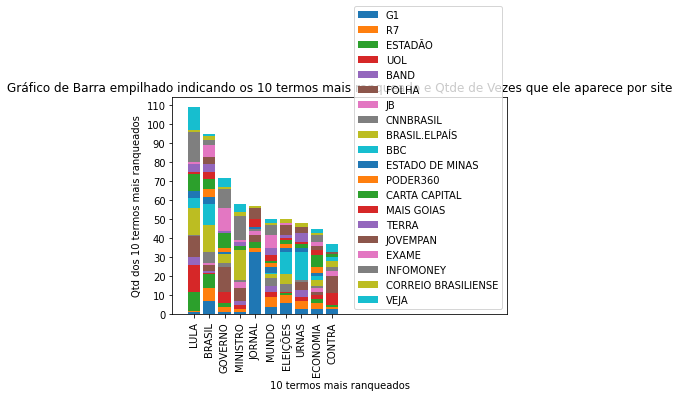

In [36]:
import numpy as np

#Criando as barras
plt.bar(listaSites, np.array(G1))
plt.bar(listaSites, np.array(R7), bottom=np.array(G1))
plt.bar(listaSites, np.array(ESTADAO), bottom=np.array(G1)+np.array(R7))
plt.bar(listaSites, np.array(UOL), bottom=np.array(G1)+np.array(R7)+np.array(ESTADAO))
plt.bar(listaSites, np.array(BAND), bottom=np.array(G1)+np.array(R7)+np.array(ESTADAO)+np.array(UOL))
plt.bar(listaSites, np.array(FOLHA), bottom=np.array(G1)+np.array(R7)+np.array(ESTADAO)+np.array(UOL)+np.array(BAND))
plt.bar(listaSites, np.array(JB), bottom=np.array(G1)+np.array(R7)+np.array(ESTADAO)+np.array(UOL)+np.array(BAND)+np.array(FOLHA))
plt.bar(listaSites, np.array(CNNBRASIL), bottom=np.array(G1)+np.array(R7)+np.array(ESTADAO)+np.array(UOL)+np.array(BAND)+np.array(FOLHA)+np.array(JB))
plt.bar(listaSites, np.array(BRASILELPAIS), bottom=np.array(G1)+np.array(R7)+np.array(ESTADAO)+np.array(UOL)+np.array(BAND)+np.array(FOLHA)+np.array(JB)+np.array(CNNBRASIL))
plt.bar(listaSites, np.array(BBC), bottom=np.array(G1)+np.array(R7)+np.array(ESTADAO)+np.array(UOL)+np.array(BAND)+np.array(FOLHA)+np.array(JB)+np.array(CNNBRASIL)+np.array(BRASILELPAIS))
plt.bar(listaSites, np.array(ESTADODEMINAS), bottom=np.array(G1)+np.array(R7)+np.array(ESTADAO)+np.array(UOL)+np.array(BAND)+np.array(FOLHA)+np.array(JB)+np.array(CNNBRASIL)+np.array(BRASILELPAIS)+np.array(BBC))
plt.bar(listaSites, np.array(PODER360), bottom=np.array(G1)+np.array(R7)+np.array(ESTADAO)+np.array(UOL)+np.array(BAND)+np.array(FOLHA)+np.array(JB)+np.array(CNNBRASIL)+np.array(BRASILELPAIS)+np.array(BBC)+np.array(ESTADODEMINAS))
plt.bar(listaSites, np.array(CARTACAPITAL), bottom=np.array(G1)+np.array(R7)+np.array(ESTADAO)+np.array(UOL)+np.array(BAND)+np.array(FOLHA)+np.array(JB)+np.array(CNNBRASIL)+np.array(BRASILELPAIS)+np.array(BBC)+np.array(ESTADODEMINAS)+np.array(PODER360))
plt.bar(listaSites, np.array(MAISGOIAS), bottom=np.array(G1)+np.array(R7)+np.array(ESTADAO)+np.array(UOL)+np.array(BAND)+np.array(FOLHA)+np.array(JB)+np.array(CNNBRASIL)+np.array(BRASILELPAIS)+np.array(BBC)+np.array(ESTADODEMINAS)+np.array(PODER360)+np.array(CARTACAPITAL))
plt.bar(listaSites, np.array(TERRA), bottom=np.array(G1)+np.array(R7)+np.array(ESTADAO)+np.array(UOL)+np.array(BAND)+np.array(FOLHA)+np.array(JB)+np.array(CNNBRASIL)+np.array(BRASILELPAIS)+np.array(BBC)+np.array(ESTADODEMINAS)+np.array(PODER360)+np.array(CARTACAPITAL)+np.array(MAISGOIAS))
plt.bar(listaSites, np.array(JOVEMPAN), bottom=np.array(G1)+np.array(R7)+np.array(ESTADAO)+np.array(UOL)+np.array(BAND)+np.array(FOLHA)+np.array(JB)+np.array(CNNBRASIL)+np.array(BRASILELPAIS)+np.array(BBC)+np.array(ESTADODEMINAS)+np.array(PODER360)+np.array(CARTACAPITAL)+np.array(MAISGOIAS)+np.array(TERRA))
plt.bar(listaSites, np.array(EXAME),bottom=np.array(G1)+np.array(R7)+np.array(ESTADAO)+np.array(UOL)+np.array(BAND)+np.array(FOLHA)+np.array(JB)+np.array(CNNBRASIL)+np.array(BRASILELPAIS)+np.array(BBC)+np.array(ESTADODEMINAS)+np.array(PODER360)+np.array(CARTACAPITAL)+np.array(MAISGOIAS)+np.array(TERRA)+np.array(JOVEMPAN))
plt.bar(listaSites, np.array(INFOMONEY), bottom=np.array(G1)+np.array(R7)+np.array(ESTADAO)+np.array(UOL)+np.array(BAND)+np.array(FOLHA)+np.array(JB)+np.array(CNNBRASIL)+np.array(BRASILELPAIS)+np.array(BBC)+np.array(ESTADODEMINAS)+np.array(PODER360)+np.array(CARTACAPITAL)+np.array(MAISGOIAS)+np.array(TERRA)+np.array(JOVEMPAN)+np.array(EXAME))
plt.bar(listaSites, np.array(CORREIOBRASILIENSE),bottom=np.array(G1)+np.array(R7)+np.array(ESTADAO)+np.array(UOL)+np.array(BAND)+np.array(FOLHA)+np.array(JB)+np.array(CNNBRASIL)+np.array(BRASILELPAIS)+np.array(BBC)+np.array(ESTADODEMINAS)+np.array(PODER360)+np.array(CARTACAPITAL)+np.array(MAISGOIAS)+np.array(TERRA)+np.array(JOVEMPAN)+np.array(EXAME)+np.array(INFOMONEY))
plt.bar(listaSites, np.array(VEJA), bottom=np.array(G1)+np.array(R7)+np.array(ESTADAO)+np.array(UOL)+np.array(BAND)+np.array(FOLHA)+np.array(JB)+np.array(CNNBRASIL)+np.array(BRASILELPAIS)+np.array(BBC)+np.array(ESTADODEMINAS)+np.array(PODER360)+np.array(CARTACAPITAL)+np.array(MAISGOIAS)+np.array(TERRA)+np.array(JOVEMPAN)+np.array(EXAME)+np.array(INFOMONEY)+np.array(CORREIOBRASILIENSE))

#Adiciando Legendas as barras
plt.xlabel("10 termos mais ranqueados")
plt.ylabel('Qtd dos 10 termos mais ranqueados')

plt.xticks(range(len(lista_top10)), lista_top10, rotation=90)
plt.yticks(range(0, 115, 10))

plt.title("Gráfico de Barra empilhado indicando os 10 termos mais ranqueado e Qtde de Vezes que ele aparece por site")

plt.legend(listaSites)

plt.show()